# Solve Vertex Coloring for simple graphs

In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import math, time, progressbar
from snn.components.neuron_class import Neuron
from snn.components.synapse_class import Synapse
from snn.components.network_class import *
from snn.functions import *
from cycler import cycler

In [2]:
np.random.seed(0)

Text(0, 0.5, 'psp')

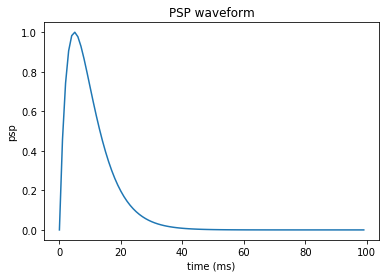

In [3]:
dt=1e-3
h = get_psp_waveform(dt, tau1=6e-3, tau2=4e-3)
plt.plot(h)
plt.title("PSP waveform")
plt.xlabel('time (ms)')
plt.ylabel('psp')

In [4]:
N = 5
w_self_raw = -2
w_cross_raw = 1.5
w_self = w_self_raw/(2*(N-1))
w_cross = w_cross_raw/(2*(N-1))
# w_self = -1/(N-1)
# w_self = -1.5/(N-1)
# w_cross = 1.5/(N-1)
v_init=np.random.uniform(0, 1, size=(N,1))
T = 1000
V_0 = 1.5
v_ext = V_0*np.ones((N, T)) + np.random.normal(0, 0.1, size=(N,T)) #same frequency of oscillation
# adj_mat = np.array([[w_self, w_cross, 0], [w_cross, w_self, w_cross], [0, w_self, w_cross]]) # 0-1-2
adj_mat = np.ones((N,N))

In [5]:
net, probe = create_network(N, w_self, w_cross, adj_mat, h, v_init, T)

In [6]:
tic = time.time()
for ti in range(T):
    net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)
    
print(f"Time take for {T} iterations={time.time()-tic}s")

Time take for 1000 iterations=0.1451420783996582s


Text(0.5, 1.05, 'wself=-2, w_cross=1.5')

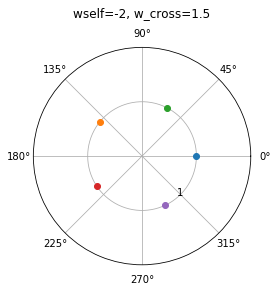

In [7]:
dphi_s,phi = settling_phase(probe['spike'], dt)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for i in range(N):
    ax.plot(np.deg2rad(dphi_s[i]),1, 'o')
    ax.set_rticks([1])
#     ax.set_rmax(1.2)
    ax.set_rlabel_position(-50)  # Move radial labels away from plotted line
plt.title(f'wself={w_self_raw}, w_cross={w_cross_raw}', pad=20)

Text(0, 0.5, 'phase (deg)')

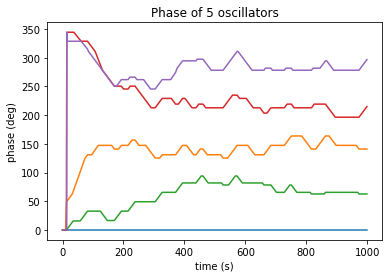

In [8]:
for i in range(N):
    plt.plot(phi[i,:])
plt.title(f'Phase of {N} oscillators')
plt.xlabel('time (s)')
plt.ylabel('phase (deg)')


In [9]:
def weight_normalization(w_self_raw, w_cross_raw, N):
    w_self = w_self_raw/(2*(N-1))
    w_cross = w_cross_raw/(2*(N-1))
    return w_self, w_cross

In [10]:
weight_normalization(w_self_raw, w_cross_raw, 2)

(-1.0, 0.75)

In [17]:
def phase_plots(N=2, w_self_raw = -2, w_cross_raw = 1.5, adj_mat=np.ones((2,2))):
    dt=1e-3
    h = get_psp_waveform(dt, tau1=6e-3, tau2=4e-3)

    w_self, w_cross = weight_normalization(w_self_raw, w_cross_raw, N)
    v_init=np.random.uniform(0, 1, size=(N,1))
    T = 1000
    V_0 = 1.5
    v_ext = V_0*np.ones((N, T)) + np.random.normal(0, 0.1, size=(N,T)) #same frequency of oscillation, with noise
    net, probe = create_network(N, w_self, w_cross, adj_mat, h, v_init, T)
    tic = time.time()
    for ti in range(T):
        net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)    
    dphi_s,dphi_t = settling_phase(probe['spike'], dt)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    colors = ['c', 'm', 'k', 'r', 'g', 'brown', 'pink', 'orange', 'b']
    ax.set_prop_cycle(cycler('color', colors[:N]))
    for i in range(N):
        ax.plot(np.deg2rad(dphi_s[i]),1, 'o')
        ax.set_rticks([1])
    #     ax.set_rmax(1.2)
        ax.set_rlabel_position(-50)  # Move radial labels away from plotted line
    ax.set_title(f'Settling phase: N= {N}, w_self={w_self}, w_cross={w_cross}', pad=20)
    plt.show()
    fig2, ax2 = plt.subplots()
    ax2.set_prop_cycle(cycler('color', colors[:N]))
    for i in range(N):
        ax2.plot(dphi_t[i,:])
    ax2.set_title(f'Phase difference vs time of {N} oscillators')
    ax2.set_xlabel('time (s)')
    ax2.set_ylabel('phase (deg)')
    plt.show()
    return dphi_s, dphi_t, probe

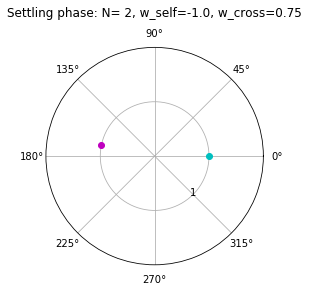

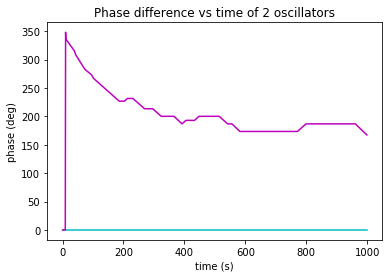

ValueError: too many values to unpack (expected 2)

In [18]:
_,_,_=phase_plots(N=2, adj_mat=np.ones((2,2)))

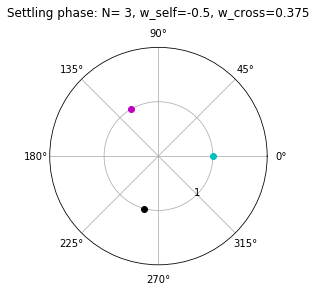

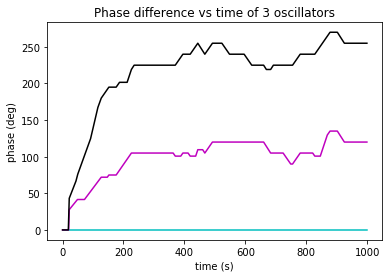

In [13]:
_,_,_=phase_plots(N=3, adj_mat=np.ones((3,3)))

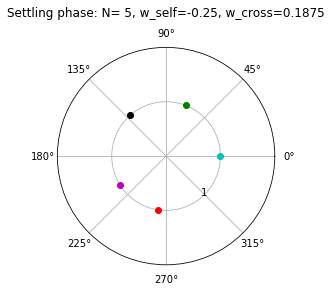

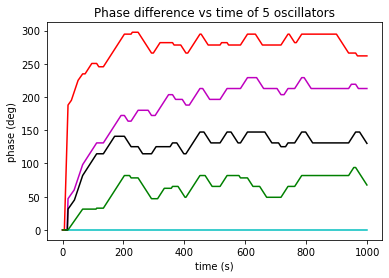

In [14]:
_,_,_=phase_plots(N=5, adj_mat=np.ones((5,5)))

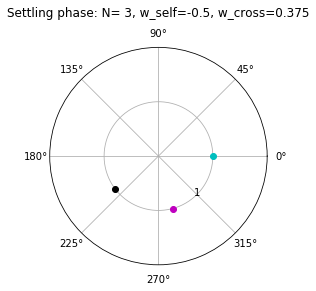

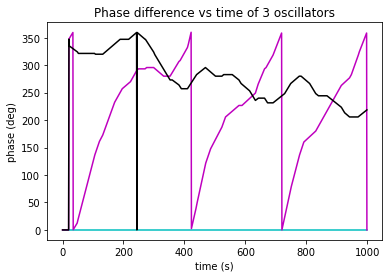

In [20]:
_,_,probe_123=phase_plots(N=3, adj_mat=np.array([[1,1,0],[1,1,1],[0,1,1]]))

In [16]:
np.array([[1,1,0],[1,1,1],[0,1,1]])

array([[1, 1, 0],
       [1, 1, 1],
       [0, 1, 1]])

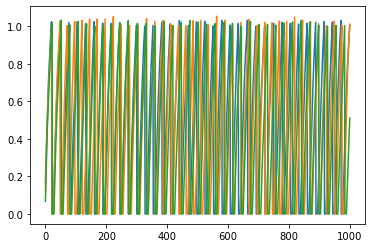

In [22]:
plt.plot(probe_123['v'][0,:])
plt.plot(probe_123['v'][1,:])
plt.plot(probe_123['v'][2,:])


In [23]:
f, ph = osc_state(probe_123['spike'], dt=1e-3)

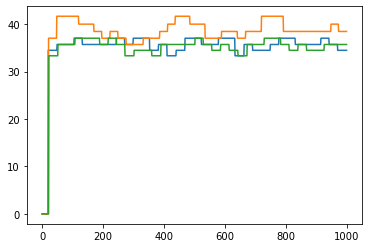

In [26]:
plt.plot(f[0,:])
plt.plot(f[1,:])
plt.plot(f[2,:])
